In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy import misc
from PIL import Image
from random import sample
vec_ganador=[]
vec_jugada_actual=[]

In [57]:
def partir_imagen_con_blanco(numero_particiones):
    i=0
    j=0
    imag_juego_partes =[]
    imagen_juego = Image.open('./resources/rick-and-morty.jpg')    
    imagen_juego_arr = np.array(imagen_juego) # 900x1200 array
    imagen_juego_arr_horizontal=np.split(imagen_juego_arr,numero_particiones)
    for i in range(numero_particiones):
        #print(i)
        imagen_juego_arr_vertical_uno=np.hsplit(imagen_juego_arr_horizontal[i],numero_particiones)
        for j in range(numero_particiones): 
            imag_juego_partes.append(imagen_juego_arr_vertical_uno[j])
    
    im_en_partes=np.array(imag_juego_partes)
    dim=imagen_juego_arr.shape
    num_part=numero_particiones*numero_particiones
    num_alto=int(dim[0]/numero_particiones)
    num_ancho=int(dim[1]/numero_particiones)
    dimens=dim[2]        
    im_en_partes.reshape(num_part,num_alto,num_ancho,dimens)
    
    #print(im_en_partes.shape)
    medidas=im_en_partes.shape
    medida_pedazo= int (medidas[1])*int (medidas[2])*int (medidas[3])
    espacio_en_blanco=np.zeros(medida_pedazo).reshape(
        1,
        medidas[1],
        medidas[2],
        medidas[3]) #espacios en blanco(caja)
    espacio_en_blanco=espacio_en_blanco.astype(int)
    partes_con_blanco=np.append(im_en_partes,espacio_en_blanco,axis = 0)
    
    #print(type(partes_con_blanco))
    #print(type(partes_con_blanco.shape))
    #print(partes_con_blanco.shape)
    
    return partes_con_blanco

In [58]:
def fun_arreglorandom(particion):    
    num_limite=particion*particion
    num_aleat=np.random.randint(0,num_limite)
    aleatorios=np.array(sample([x for x in range(0,num_limite)],num_limite-1))
    aleatorios=np.insert(aleatorios,num_aleat,num_limite) 
    #print(aleatorios)
    #global vec_imagen_orig
    #vec_imagen_orig=aleatorios
    return aleatorios

In [59]:
def fun_orden_indices(valor,vec_im_or):
    i=0
    j=0
    n=0
    indice_n=0
    numeros=np.arange(valor)
    vec_imagen_o=vec_im_or
    vec_imagen=vec_imagen_o
        
    for i in range(valor):
        existe=numeros[i] in vec_imagen
        #print(existe)
        if(existe==False):
            n=numeros[i]
            v=vec_imagen!=valor
            #print(v)
            for j in range(len(v)):
                if(v[j]==False):
                    indice_n=j
    vec_imagen[indice_n]=n    
    return vec_imagen

In [60]:
def arreglo_indices_ganador(long,vec_imagen_o):
    
    orden_ganar=[]
    k=0
    l_tud=long*long
    orden=fun_orden_indices(l_tud,vec_imagen_o)    
    
    #dicionario con etiquetas desordenadas
    if (long==2):                
        claves_val={
            str(orden[0]):0,
            str(orden[1]):1,
            str(orden[2]):2,
            str(orden[3]):3                     
        }
        #ordena el diccionrio con los valores actuales
        numeros_sort = sorted(claves_val.items())
        #almaceno valores ordenados
        for k in np.arange(l_tud):
            orden_ganar.append(int(numeros_sort[k][1]))         
        
        #print("orden Ganar",orden_ganar)#almacena los valores con los que ganamos
    return orden_ganar

In [61]:
def inicio_roto_con_blanco(particion):
          
    img_pd_blanco=partir_imagen_con_blanco(particion)
    arr_random=fun_arreglorandom(particion)
    print("vectorInicio",arr_random)    
    
    if (particion==2):
        #filas
        imagen_con_espacio_uno = np.concatenate((        
        img_pd_blanco[arr_random[0]],
        img_pd_blanco[arr_random[1]]        
        ),axis=1)
        #columnas
        imagen_con_espacio_dos = np.concatenate((        
        img_pd_blanco[arr_random[2]],
        img_pd_blanco[arr_random[3]]        
        ),axis=1)

        imagen_espacios_completa_prub=np.concatenate((
        imagen_con_espacio_uno,    
        imagen_con_espacio_dos
        ))
        orden_ganar=arreglo_indices_ganador(particion,arr_random)    
        print("ordenganar caragoarriba",orden_ganar)
        global vec_ganador
        vec_ganador=orden_ganar
        return imagen_espacios_completa_prub
    
    elif (particion==3):
        
        imagen_con_espacio_uno = np.concatenate((        
        img_pd_blanco[arr_random[0]],
        img_pd_blanco[arr_random[1]],
        img_pd_blanco[arr_random[2]]        
        ),axis=1)

        imagen_con_espacio_dos = np.concatenate((
        img_pd_blanco[arr_random[3]],
        img_pd_blanco[arr_random[4]],
        img_pd_blanco[arr_random[5]]
        ),axis=1)
        
        imagen_con_espacio_tres = np.concatenate((
        img_pd_blanco[arr_random[6]],
        img_pd_blanco[arr_random[7]],
        img_pd_blanco[arr_random[8]]
        ),axis=1)

        imagen_espacios_completa_prub=np.concatenate((
        imagen_con_espacio_uno,    
        imagen_con_espacio_dos,
        imagen_con_espacio_tres
        ))
        return imagen_espacios_completa_prub            
    
    elif (particion==4):
        
        imagen_con_espacio_uno = np.concatenate((        
        img_pd_blanco[arr_random[0]],
        img_pd_blanco[arr_random[1]],
        img_pd_blanco[arr_random[2]],
        img_pd_blanco[arr_random[3]] 
        ),axis=1)

        imagen_con_espacio_dos = np.concatenate((
        img_pd_blanco[arr_random[4]],
        img_pd_blanco[arr_random[5]],
        img_pd_blanco[arr_random[6]],
        img_pd_blanco[arr_random[7]]
        ),axis=1)
        
        imagen_con_espacio_tres = np.concatenate((
        img_pd_blanco[arr_random[8]],
        img_pd_blanco[arr_random[9]],
        img_pd_blanco[arr_random[10]],
        img_pd_blanco[arr_random[11]]
        ),axis=1)
        
        imagen_con_espacio_cuatro = np.concatenate((
        img_pd_blanco[arr_random[12]],
        img_pd_blanco[arr_random[13]],
        img_pd_blanco[arr_random[14]],
        img_pd_blanco[arr_random[15]]
        ),axis=1)

        imagen_espacios_completa_prub=np.concatenate((
        imagen_con_espacio_uno,    
        imagen_con_espacio_dos,
        imagen_con_espacio_tres,
        imagen_con_espacio_cuatro
        ))
        return imagen_espacios_completa_prub
       
    elif (particion==5):
        
        imagen_con_espacio_uno = np.concatenate((        
        img_pd_blanco[arr_random[0]],
        img_pd_blanco[arr_random[1]],
        img_pd_blanco[arr_random[2]],
        img_pd_blanco[arr_random[3]],
        img_pd_blanco[arr_random[4]] 
        ),axis=1)

        imagen_con_espacio_dos = np.concatenate((
        img_pd_blanco[arr_random[5]],
        img_pd_blanco[arr_random[6]],
        img_pd_blanco[arr_random[7]],
        img_pd_blanco[arr_random[8]],
        img_pd_blanco[arr_random[9]]
        ),axis=1)
        
        imagen_con_espacio_tres = np.concatenate((
        img_pd_blanco[arr_random[10]],
        img_pd_blanco[arr_random[11]],
        img_pd_blanco[arr_random[12]],
        img_pd_blanco[arr_random[13]],
        img_pd_blanco[arr_random[14]]
        ),axis=1)
        
        imagen_con_espacio_cuatro = np.concatenate((
        img_pd_blanco[arr_random[15]],
        img_pd_blanco[arr_random[16]],
        img_pd_blanco[arr_random[17]],
        img_pd_blanco[arr_random[18]],
        img_pd_blanco[arr_random[19]]
        ),axis=1)
        
        imagen_con_espacio_cinco = np.concatenate((
        img_pd_blanco[arr_random[20]],
        img_pd_blanco[arr_random[21]],
        img_pd_blanco[arr_random[22]],
        img_pd_blanco[arr_random[23]],
        img_pd_blanco[arr_random[24]]
        ),axis=1)

        imagen_espacios_completa_prub=np.concatenate((
        imagen_con_espacio_uno,    
        imagen_con_espacio_dos,
        imagen_con_espacio_tres,
        imagen_con_espacio_cuatro,
        imagen_con_espacio_cinco
        ))
        return imagen_espacios_completa_prub
    
    elif (particion==6):
        
        imagen_con_espacio_uno = np.concatenate((        
        img_pd_blanco[arr_random[0]],
        img_pd_blanco[arr_random[1]],
        img_pd_blanco[arr_random[2]],
        img_pd_blanco[arr_random[3]],
        img_pd_blanco[arr_random[4]],
        img_pd_blanco[arr_random[5]] 
        ),axis=1)

        imagen_con_espacio_dos = np.concatenate((
        img_pd_blanco[arr_random[6]],
        img_pd_blanco[arr_random[7]],
        img_pd_blanco[arr_random[8]],
        img_pd_blanco[arr_random[9]],
        img_pd_blanco[arr_random[10]],
        img_pd_blanco[arr_random[11]]
        ),axis=1)
        
        imagen_con_espacio_tres = np.concatenate((
        img_pd_blanco[arr_random[12]],
        img_pd_blanco[arr_random[13]],
        img_pd_blanco[arr_random[14]],
        img_pd_blanco[arr_random[15]],
        img_pd_blanco[arr_random[16]],
        img_pd_blanco[arr_random[17]]
        ),axis=1)
        
        imagen_con_espacio_cuatro = np.concatenate((
        img_pd_blanco[arr_random[18]],
        img_pd_blanco[arr_random[19]],
        img_pd_blanco[arr_random[20]],
        img_pd_blanco[arr_random[21]],
        img_pd_blanco[arr_random[22]],
        img_pd_blanco[arr_random[23]]
        ),axis=1)
        
        imagen_con_espacio_cinco = np.concatenate((
        img_pd_blanco[arr_random[24]],
        img_pd_blanco[arr_random[25]],
        img_pd_blanco[arr_random[26]],
        img_pd_blanco[arr_random[27]],
        img_pd_blanco[arr_random[28]],
        img_pd_blanco[arr_random[29]]
        ),axis=1)
        
        imagen_con_espacio_seis = np.concatenate((
        img_pd_blanco[arr_random[30]],
        img_pd_blanco[arr_random[31]],
        img_pd_blanco[arr_random[32]],
        img_pd_blanco[arr_random[33]],
        img_pd_blanco[arr_random[34]],
        img_pd_blanco[arr_random[35]]
        ),axis=1)

        imagen_espacios_completa_prub=np.concatenate((
        imagen_con_espacio_uno,    
        imagen_con_espacio_dos,
        imagen_con_espacio_tres,
        imagen_con_espacio_cuatro,
        imagen_con_espacio_cinco,
        imagen_con_espacio_seis
        ))
        return imagen_espacios_completa_prub                
    else:
        print("No es un valor valido por el tamanio de la imagen")
    
    #funcion que da el arreglo ganador
    #print("antes de ordenar")
    #orden_ganar=arreglo_indices_ganador(particion,arr_random)    
    #print("ordenganar caragoarriba",orden_ganar)
    #global vec_ganador
    #vec_ganador=orden_ganar
    #print("ganador",vec_ganador)
    #print("ordenganar caragoarriba",orden_ganar)
    

In [62]:
def alterarindicies_dosXdos(tamanio,indice, movimiento):
    
    contenedor=np.arange(tamanio)
    
    if (movimiento=="derecha"):                        
        
        contenedor[indice], contenedor[indice+1] = contenedor[indice+1], contenedor[indice]
        return contenedor
                
    elif (movimiento=="izquierda"):                
        
        contenedor[indice], contenedor[indice-1] = contenedor[indice-1], contenedor[indice]
        return contenedor
        
    elif (movimiento=="arriba"):
                        
        contenedor[indice], contenedor[indice-2] = contenedor[indice-2], contenedor[indice]
        return contenedor
        
    elif (movimiento=="abajo"):
        
        contenedor[indice], contenedor[indice+2] = contenedor[indice+2], contenedor[indice]
        return contenedor
        
    else:
        print("")

In [63]:
def ordenar_imagen(particion,nv_orden_jueg,imag_en_part):
          
    if (particion==2):
        #filas
        imagen_con_espacio_uno = np.concatenate((        
        imag_en_part[nv_orden_jueg[0]],
        imag_en_part[nv_orden_jueg[1]]
        ),axis=1)
        #columnas
        imagen_con_espacio_dos = np.concatenate((        
        imag_en_part[nv_orden_jueg[2]],
        imag_en_part[nv_orden_jueg[3]]
        ),axis=1)

        imagen_espacios_completa_prub=np.concatenate((
        imagen_con_espacio_uno,
        imagen_con_espacio_dos
        ))
        global vec_jugada_actual    
        vec_jugada_actual=nv_orden_jueg
        return imagen_espacios_completa_prub
    
    elif (particion==3):
        
        imagen_con_espacio_uno = np.concatenate((        
        imag_en_part[nv_orden_jueg[0]],
        imag_en_part[nv_orden_jueg[1]],
        imag_en_part[nv_orden_jueg[2]]        
        ),axis=1)

        imagen_con_espacio_dos = np.concatenate((
        imag_en_part[nv_orden_jueg[3]],
        imag_en_part[nv_orden_jueg[4]],
        imag_en_part[nv_orden_jueg[5]]
        ),axis=1)
        
        imagen_con_espacio_tres = np.concatenate((
        imag_en_part[nv_orden_jueg[6]],
        imag_en_part[nv_orden_jueg[7]],
        imag_en_part[nv_orden_jueg[8]]
        ),axis=1)

        imagen_espacios_completa_prub=np.concatenate((
        imagen_con_espacio_uno,    
        imagen_con_espacio_dos,
        imagen_con_espacio_tres
        ))
        return imagen_espacios_completa_prub            
    
    elif (particion==4):
        
        imagen_con_espacio_uno = np.concatenate((        
        imag_en_part[nv_orden_jueg[0]],
        imag_en_part[nv_orden_jueg[1]],
        imag_en_part[nv_orden_jueg[2]],
        imag_en_part[nv_orden_jueg[3]], 
        ),axis=1)

        imagen_con_espacio_dos = np.concatenate((
        imag_en_part[nv_orden_jueg[4]],
        imag_en_part[nv_orden_jueg[5]],
        imag_en_part[nv_orden_jueg[6]],
        imag_en_part[nv_orden_jueg[7]]
        ),axis=1)
        
        imagen_con_espacio_tres = np.concatenate((
        imag_en_part[nv_orden_jueg[8]],
        imag_en_part[nv_orden_jueg[9]],
        imag_en_part[nv_orden_jueg[10]],
        imag_en_part[nv_orden_jueg[11]]
        ),axis=1)
        
        imagen_con_espacio_cuatro = np.concatenate((
        imag_en_part[nv_orden_jueg[12]],
        imag_en_part[nv_orden_jueg[13]],
        imag_en_part[nv_orden_jueg[14]],
        imag_en_part[nv_orden_jueg[15]]
        ),axis=1)

        imagen_espacios_completa_prub=np.concatenate((
        imagen_con_espacio_uno,    
        imagen_con_espacio_dos,
        imagen_con_espacio_tres,
        imagen_con_espacio_cuatro
        ))
        return imagen_espacios_completa_prub
       
    elif (particion==5):
        
        imagen_con_espacio_uno = np.concatenate((        
        imag_en_part[nv_orden_jueg[0]],
        imag_en_part[nv_orden_jueg[1]],
        imag_en_part[nv_orden_jueg[2]],
        imag_en_part[nv_orden_jueg[3]],
        imag_en_part[nv_orden_jueg[4]]
        ),axis=1)

        imagen_con_espacio_dos = np.concatenate((
        imag_en_part[nv_orden_jueg[5]],
        imag_en_part[nv_orden_jueg[6]],
        imag_en_part[nv_orden_jueg[7]],
        imag_en_part[nv_orden_jueg[8]],
        imag_en_part[nv_orden_jueg[9]]
        ),axis=1)
        
        imagen_con_espacio_tres = np.concatenate((
        imag_en_part[nv_orden_jueg[10]],
        imag_en_part[nv_orden_jueg[11]],
        imag_en_part[nv_orden_jueg[12]],
        imag_en_part[nv_orden_jueg[13]],
        imag_en_part[nv_orden_jueg[14]]
        ),axis=1)
        
        imagen_con_espacio_cuatro = np.concatenate((
        imag_en_part[nv_orden_jueg[15]],
        imag_en_part[nv_orden_jueg[16]],
        imag_en_part[nv_orden_jueg[17]],
        imag_en_part[nv_orden_jueg[18]],
        imag_en_part[nv_orden_jueg[19]]
        ),axis=1)
        
        imagen_con_espacio_cinco = np.concatenate((
        imag_en_part[nv_orden_jueg[20]],
        imag_en_part[nv_orden_jueg[21]],
        imag_en_part[nv_orden_jueg[22]],
        imag_en_part[nv_orden_jueg[23]],
        imag_en_part[nv_orden_jueg[24]]
        ),axis=1)

        imagen_espacios_completa_prub=np.concatenate((
        imagen_con_espacio_uno,    
        imagen_con_espacio_dos,
        imagen_con_espacio_tres,
        imagen_con_espacio_cuatro,
        imagen_con_espacio_cinco
        ))
        return imagen_espacios_completa_prub
    
    elif (particion==6):
        
        imagen_con_espacio_uno = np.concatenate((        
        imag_en_part[nv_orden_jueg[0]],
        imag_en_part[nv_orden_jueg[1]],
        imag_en_part[nv_orden_jueg[2]],
        imag_en_part[nv_orden_jueg[3]],
        imag_en_part[nv_orden_jueg[4]],
        imag_en_part[nv_orden_jueg[5]]
        ),axis=1)

        imagen_con_espacio_dos = np.concatenate((
        imag_en_part[nv_orden_jueg[6]],
        imag_en_part[nv_orden_jueg[7]],
        imag_en_part[nv_orden_jueg[8]],
        imag_en_part[nv_orden_jueg[9]],
        imag_en_part[nv_orden_jueg[10]],
        imag_en_part[nv_orden_jueg[11]]
        ),axis=1)
        
        imagen_con_espacio_tres = np.concatenate((
        imag_en_part[nv_orden_jueg[12]],
        imag_en_part[nv_orden_jueg[13]],
        imag_en_part[nv_orden_jueg[14]],
        imag_en_part[nv_orden_jueg[15]],
        imag_en_part[nv_orden_jueg[16]],
        imag_en_part[nv_orden_jueg[17]]
        ),axis=1)
        
        imagen_con_espacio_cuatro = np.concatenate((
        imag_en_part[nv_orden_jueg[18]],
        imag_en_part[nv_orden_jueg[19]],
        imag_en_part[nv_orden_jueg[20]],
        imag_en_part[nv_orden_jueg[21]],
        imag_en_part[nv_orden_jueg[22]],
        imag_en_part[nv_orden_jueg[23]]
        ),axis=1)
        
        imagen_con_espacio_cinco = np.concatenate((
        imag_en_part[nv_orden_jueg[24]],
        imag_en_part[nv_orden_jueg[25]],
        imag_en_part[nv_orden_jueg[26]],
        imag_en_part[nv_orden_jueg[27]],
        imag_en_part[nv_orden_jueg[28]],
        imag_en_part[nv_orden_jueg[29]]
        ),axis=1)
        
        imagen_con_espacio_seis = np.concatenate((
        imag_en_part[nv_orden_jueg[30]],
        imag_en_part[nv_orden_jueg[31]],
        imag_en_part[nv_orden_jueg[32]],
        imag_en_part[nv_orden_jueg[33]],
        imag_en_part[nv_orden_jueg[34]],
        imag_en_part[nv_orden_jueg[35]]
        ),axis=1)

        imagen_espacios_completa_prub=np.concatenate((
        imagen_con_espacio_uno,    
        imagen_con_espacio_dos,
        imagen_con_espacio_tres,
        imagen_con_espacio_cuatro,
        imagen_con_espacio_cinco,
        imagen_con_espacio_seis
        ))
        return imagen_espacios_completa_prub                
    else:
        print("No es un valor valido por el tamanio de la imagen")
        
    #global vec_jugada_actual    
    #vec_jugada_actual=nv_orden_jueg
    #print("orden actual",nv_orden_jueg)

In [64]:
def juego_odamiento(numero_particiones,imagen_rand,pieza,direccion):        
    
    i=0
    j=0    
    imag_juego_partes =[]    
    longitud=int(numero_particiones*numero_particiones)        
    
    #fragmentamos la imagen    
    imagen_juego_arr = np.array(imagen_rand) # 900x1200 array
    imagen_juego_arr_horizontal=np.split(imagen_juego_arr,numero_particiones)
    for i in range(numero_particiones):        
        imagen_juego_arr_vertical_uno=np.hsplit(imagen_juego_arr_horizontal[i],numero_particiones)
        for j in range(numero_particiones): 
            imag_juego_partes.append(imagen_juego_arr_vertical_uno[j])    
    im_en_partes=np.array(imag_juego_partes)
                                     
    #obtenemos el nuevo arreglo modificado
    nv_orden_jg=alterarindicies_dosXdos(longitud,pieza,direccion)    
    print("nuevo arreglo modificado",nv_orden_jg)
    #obtenemos la imagen armada con el nuevo cambio
    imgn_cambiada=ordenar_imagen(numero_particiones,nv_orden_jg,im_en_partes)

    return imgn_cambiada

vectorInicio [4 3 1 2]
ordenganar caragoarriba [0, 2, 3, 1]
Ganador [0, 2, 3, 1]


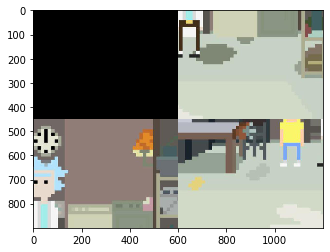

In [65]:
dimensiones=2
imagen_rand=inicio_roto_con_blanco(dimensiones)
print("Ganador",vec_ganador)
plt.imshow(imagen_rand)

nuevo arreglo modificado [2 1 0 3]
ganador [0, 2, 3, 1]
[2 1 0 3]


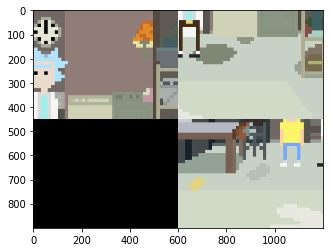

In [66]:
#paul=juego_odamiento(2,imagen_rand,2,"derecha")
#paul=juego_odamiento(2,imagen_rand,2,"izquierda")
#paul=juego_odamiento(2,imagen_rand,2,"abajo")
#debo llamar a esta funcion un y otra vez con el valor que retorno como parametro
paul=juego_odamiento(2,imagen_rand,2,"arriba")
print("ganador",vec_ganador)
plt.imshow(paul)
print(vec_jugada_actual)

nuevo arreglo modificado [0 1 3 2]
ganador [0, 2, 3, 1]
[0 1 3 2]


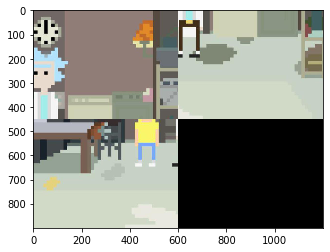

In [67]:
paul1=juego_odamiento(2,paul,3,"izquierda")
print("ganador",vec_ganador)
plt.imshow(paul1)
print(vec_jugada_actual)

nuevo arreglo modificado [0 3 2 1]
ganador [0, 2, 3, 1]


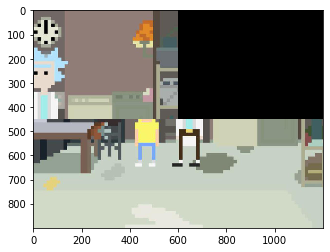

In [68]:
paul2=juego_odamiento(2,paul1,1,"abajo")
print("ganador",vec_ganador)
plt.imshow(paul2)

In [104]:
def fun_juego(dimen,im_ran):
    print(vec_ganador)
    print(vec_jugada_actual)
    while(((vec_ganador==vec_jugada_actual).all())!=True):
        #pido valores
        print("ingresa valores  armar")        
        indice=int(input("Ingresa indice: "))
        movimiento=str(input("Ingresa movida: "))
        paul=juego_odamiento(dimen,im_ran,indice,movimiento)        
        #print("ganador",vec_ganador)
        print("antes de dibujar")
        plt.imshow(paul)
        print("me salto el dibujar")
        imagen_rand=paul
        print("inicio de nuevo")
        #return paul
    print("has ganado")

vectorInicio [0 4 3 2]
ordenganar caragoarriba [0, 1, 3, 2]


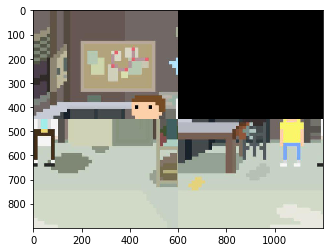

In [90]:
dimensiones=2
imagen_rand=inicio_roto_con_blanco(dimensiones)
plt.imshow(imagen_rand)

In [106]:
#fun_juego(dimensiones,imagen_rand)